In [6]:
import sympy as sp
sp.init_printing()

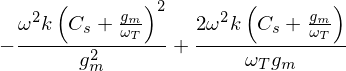

In [10]:
# Problem 1 hacking
k, w, Cs, gm, wT = sp.symbols('k \omega C_s g_m \omega_T', nonzero=True)
d_dgm = (sp.diff(k * w**2 * (1/gm) * (Cs + (gm / wT))**2, gm))
display(d_dgm)
sp.nonlinsolve([
    d_dgm
], gm)

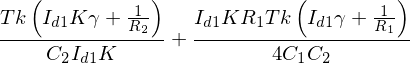

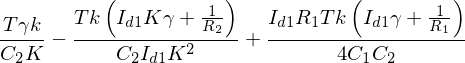

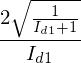

In [45]:
# Problem 2 noise derivative
k, T, gm1, gm2, gamma, R1, R2, C1, C2, wp1, wp2, Av1, Av2 = sp.symbols(
    'k T g_{m1} g_{m2} \gamma R_1 R_2 C_1 C_2 \omega_{p1} \omega_{p2} A_{v1} A_{v2}')
noise = 4*k*T*(gm2*gamma + (1/R2))* (1/gm2)**2 * (wp2 / 4) + \
    4*k*T*(gm1*gamma + (1/R1))* R1**2 * Av2**2 * ((wp1*wp2)/16)
Id1, K = sp.symbols('I_{d1} K', nonzero=True)
noise = noise.subs(wp1, 1 / (R1*C1))
noise = noise.subs(wp2, gm2 / C2)
noise = noise.subs(Av1, gm1*R1)
noise = noise.subs(Av2, 1)
noise = noise.subs(gm1, Id1)
noise = noise.subs(gm2, Id1*K)
display(noise)
display(noise.diff(K))
sol = sp.nonlinsolve([
    noise.diff(K)
], K)
sol_term = sol.args[0][0].args[0].args[1]
sol_term = sol_term.subs({C1: 1, R2:1, R1:1, gamma:1})
display(sol_term.simplify())

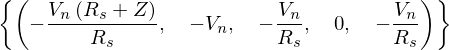

In [50]:
# Problem 3
Vout, Vx, Vn, i1, i2, i3, Rs, Z = sp.symbols('V_{out} V_x V_n i_1 i_2 i_3 R_s Z')
sol = sp.nonlinsolve([
    Vx + Vn,
    Vx - i1*Rs,
    i1 - i3 - i2,
    Vout - Vx - Z*i3,
    i2
], [Vout, Vx, i1, i2 , i3])
display(sol)